# THỰC HÀNH PHÂN LỚP VĂN BẢN CƠ BẢN VỚI DATA XỊN

## Importing the libraries

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import time 

## Importing the dataset

In [81]:
#tap train
X_train = pd.read_csv('UIT-VSFC/train/sents.txt',
sep=" \n",engine='python',header=None, index_col=None)
y_train = pd.read_csv('UIT-VSFC/train/sentiments.txt',
sep=" \n",engine='python', header=None, index_col=None)

#tap dev
X_dev = pd.read_csv('UIT-VSFC/dev/sents.txt', 
sep=' \n',engine='python', header=None, index_col=None)
y_dev = pd.read_csv('UIT-VSFC/dev/sentiments.txt',
sep=' \n',engine='python', header=None, index_col=None)

#tap test
X_test = pd.read_csv('UIT-VSFC/test/sents.txt',
sep=' \n',engine='python', header=None, index_col=None)
y_test = pd.read_csv('UIT-VSFC/test/sentiments.txt',
sep=' \n',engine='python', header=None, index_col=None)

### Preview dataset

In [51]:
X_train[0]

0                                slide giáo trình đầy đủ .
1           nhiệt tình giảng dạy , gần gũi với sinh viên .
2                     đi học đầy đủ full điểm chuyên cần .
3        chưa áp dụng công nghệ thông tin và các thiết ...
4        thầy giảng bài hay , có nhiều bài tập ví dụ ng...
                               ...                        
11421    chỉ vì môn game mà em học hai lần mà không qua...
11422                                 em cảm ơn cô nhiều .
11423                             giao bài tập quá nhiều .
11424                 giáo viên dạy dễ hiểu , nhiệt tình .
11425    gói gọn doubledot hay , tận tình , phù hợp với...
Name: 0, Length: 11426, dtype: object

In [52]:
X_test

,0
0,nói tiếng anh lưu loát .
1,giáo viên rất vui tính .
2,cô max có tâm .
3,"giảng bài thu hút , dí dỏm ."
4,"giáo viên không giảng dạy kiến thức , hướng dẫ..."
...,...
3161,"các slide khó hiểu , ngôn ngữ trong slide phức..."
3162,giáo viên giảng dạy có tâm huyết .
3163,chia sẻ cho em nhiều điều hay .
3164,em tiếp thu chậm .


In [53]:
y_test

,0
0,2
1,2
2,2
3,2
4,0
...,...
3161,0
3162,2
3163,2
3164,0


### Flatten y values

In [82]:
y_train = y_train.values.flatten()
y_dev = y_dev.values.flatten()
y_test = y_test.values.flatten()

In [55]:
y_test

array([2, 2, 2, ..., 2, 0, 1])

## Preprocessing

## Encoding by CountVectorizer lib

Sử dụng thư viện CountVectorizer để mã hoá văn bản thô ban đầu thành dạng vector tính tần suất xuất hiện của các từ trong văn bản.

In [83]:
from sklearn.feature_extraction.text import CountVectorizer
#ma hoa van ban thanh dang vector tan suat
encoder = CountVectorizer(ngram_range=(2, 2))
encoder.fit(X_train[0])

CountVectorizer(ngram_range=(2, 2))

In [84]:
encoder.vocabulary_
#tap tu vung de tinh tan suat

{'slide giáo': 19651,
 'giáo trình': 7042,
 'trình đầy': 23733,
 'đầy đủ': 30215,
 'nhiệt tình': 15712,
 'tình giảng': 24486,
 'giảng dạy': 7216,
 'dạy gần': 5850,
 'gần gũi': 7752,
 'gũi với': 7734,
 'với sinh': 27898,
 'sinh viên': 19599,
 'đi học': 29041,
 'học đầy': 9663,
 'đủ full': 31210,
 'full điểm': 6736,
 'điểm chuyên': 29158,
 'chuyên cần': 1996,
 'chưa áp': 2398,
 'áp dụng': 28786,
 'dụng công': 6383,
 'công nghệ': 4229,
 'nghệ thông': 14845,
 'thông tin': 21499,
 'tin và': 22823,
 'và các': 26723,
 'các thiết': 3263,
 'thiết bị': 20690,
 'bị hỗ': 1334,
 'hỗ trợ': 9803,
 'trợ cho': 24094,
 'cho việc': 1928,
 'việc giảng': 26506,
 'thầy giảng': 21839,
 'giảng bài': 7185,
 'bài hay': 567,
 'hay có': 7940,
 'có nhiều': 3872,
 'nhiều bài': 15482,
 'bài tập': 670,
 'tập ví': 25371,
 'ví dụ': 27343,
 'dụ ngay': 6325,
 'ngay trên': 14592,
 'trên lớp': 23548,
 'giảng viên': 7312,
 'viên đảm': 26412,
 'đảm bảo': 30149,
 'bảo thời': 1145,
 'thời gian': 22458,
 'gian lên': 6862,
 'lên

In [85]:
#Tien hanh ma hoa 3 tap X
X_train_encoded = encoder.transform(X_train[0])
X_dev_encoded = encoder.transform(X_dev[0])
X_test_encoded = encoder.transform(X_test[0])

In [59]:
type(X_train_encoded)

scipy.sparse._csr.csr_matrix

In [60]:
print(X_train_encoded)

  (0, 7042)	1
  (0, 19651)	1
  (0, 23733)	1
  (0, 30215)	1
  (1, 5850)	1
  (1, 7216)	1
  (1, 7734)	1
  (1, 7752)	1
  (1, 15712)	1
  (1, 19599)	1
  (1, 24486)	1
  (1, 27898)	1
  (2, 1996)	1
  (2, 6736)	1
  (2, 9663)	1
  (2, 29041)	1
  (2, 29158)	1
  (2, 30215)	1
  (2, 31210)	1
  (3, 1334)	1
  (3, 1928)	1
  (3, 2398)	1
  (3, 3263)	1
  (3, 4229)	1
  (3, 6383)	1
  :	:
  (11423, 18472)	1
  (11423, 25313)	1
  (11424, 5838)	1
  (11424, 6210)	1
  (11424, 7046)	1
  (11424, 8259)	1
  (11424, 15712)	1
  (11424, 26105)	1
  (11425, 4387)	1
  (11425, 4852)	1
  (11425, 5373)	1
  (11425, 7697)	1
  (11425, 7830)	1
  (11425, 8087)	1
  (11425, 9882)	1
  (11425, 13799)	1
  (11425, 14191)	1
  (11425, 15715)	1
  (11425, 16011)	1
  (11425, 17830)	1
  (11425, 23736)	1
  (11425, 24550)	1
  (11425, 25164)	1
  (11425, 27875)	1
  (11425, 30975)	1


### Feature Scaling


In [64]:
# from sklearn.preprocessing import normalize
# X_train_encoded = normalize(X_train_encoded, norm='l1', axis=1)
# X_dev_encoded = normalize(X_dev_encoded, norm='l1', axis=1)
# X_test_encoded = normalize(X_test_encoded, norm='l1', axis=1)

In [65]:
# print(X_train_encoded)

  (0, 7042)	0.25
  (0, 19651)	0.25
  (0, 23733)	0.25
  (0, 30215)	0.25
  (1, 5850)	0.125
  (1, 7216)	0.125
  (1, 7734)	0.125
  (1, 7752)	0.125
  (1, 15712)	0.125
  (1, 19599)	0.125
  (1, 24486)	0.125
  (1, 27898)	0.125
  (2, 1996)	0.14285714285714288
  (2, 6736)	0.14285714285714288
  (2, 9663)	0.14285714285714288
  (2, 29041)	0.14285714285714288
  (2, 29158)	0.14285714285714288
  (2, 30215)	0.14285714285714288
  (2, 31210)	0.14285714285714288
  (3, 1334)	0.0625
  (3, 1928)	0.0625
  (3, 2398)	0.0625
  (3, 3263)	0.0625
  (3, 4229)	0.0625
  (3, 6383)	0.0625
  :	:
  (11423, 18472)	0.25
  (11423, 25313)	0.25
  (11424, 5838)	0.16666666666666669
  (11424, 6210)	0.16666666666666669
  (11424, 7046)	0.16666666666666669
  (11424, 8259)	0.16666666666666669
  (11424, 15712)	0.16666666666666669
  (11424, 26105)	0.16666666666666669
  (11425, 4387)	0.058823529411764705
  (11425, 4852)	0.058823529411764705
  (11425, 5373)	0.058823529411764705
  (11425, 7697)	0.058823529411764705
  (11425, 7830)	0.05882

### Training the Naive Bayes model (CountVectorized)

In [116]:
from sklearn.naive_bayes import MultinomialNB
start_time = time.time()
classifier_nb = MultinomialNB().fit(X_train_encoded,y_train)
train_time = time.time()-start_time
print("Done train Naive Bayes model in ", train_time, "seconds.")

Done train Naive Bayes model in  0.012722969055175781 seconds.


In [117]:
y_pred_NB = classifier_nb.predict(X_test_encoded)

In [154]:
from sklearn.metrics import accuracy_score, f1_score
train_score_count_naive = classifier_nb.score(X_train_encoded, y_train)
accuracy_count_naive = accuracy_score(y_test, y_pred_NB)*100
f1_score_count_naive = f1_score(y_test, y_pred_NB, average='macro')*100
print(f"Score train: {train_score_count_naive}")
print(f"accuracy: {accuracy_count_naive}")
print(f"f1_score: {f1_score_count_naive}")

Score train: 0.9329599159810957
accuracy: 86.26026531901452
f1_score: 61.264058918064244


In [119]:
from sklearn.metrics import confusion_matrix
cf_NB = confusion_matrix(y_test, y_pred_NB)
cf_NB

array([[1288,    1,  120],
       [  93,    6,   68],
       [ 150,    3, 1437]])

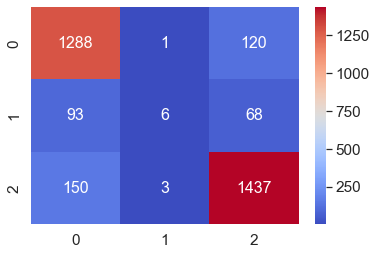

In [120]:
df_cm_NB = pd.DataFrame(cf_NB, range(3), range(3)) 
sns.set(font_scale=1.4)
sns.heatmap(df_cm_NB, annot=True, annot_kws={"size": 16}, fmt='d', cmap='coolwarm')
plt.show()

### Training the Logistic Regression model (CountVectorized)

In [107]:
from sklearn.linear_model import LogisticRegression
import time
start_time = time.time()
classifier_logr = LogisticRegression(solver='lbfgs', 
                         multi_class='auto', 
                         max_iter=10000).fit(X_train_encoded, y_train)
 
train_time = time.time() - start_time
print('Done training Linear Classifier in', train_time, 'seconds.')

Done training Linear Classifier in 2.454740047454834 seconds.


In [108]:
y_pred_LogR = classifier_logr.predict(X_test_encoded)

In [109]:
print(np.concatenate((y_pred_LogR.reshape(len(y_pred_LogR),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [2 2]
 [2 2]
 ...
 [2 2]
 [2 0]
 [0 1]]


In [155]:
from sklearn.metrics import accuracy_score, f1_score
train_score_count_logr = classifier_logr.score(X_train_encoded, y_train)
accuracy_count_logr = accuracy_score(y_test, y_pred_LogR)*100
f1_score_count_logr = f1_score(y_test, y_pred_LogR, average='macro')*100
print(f"Score train: {train_score_count_logr}")
print(f"accuracy: {accuracy_count_logr}")
print(f"f1_score: {f1_score_count_logr}")

Score train: 0.9851216523717836
accuracy: 87.08149084017688
f1_score: 65.45099659996735


In [112]:
from sklearn.metrics import confusion_matrix
cf_LogR = confusion_matrix(y_test, y_pred_LogR)
cf_LogR

array([[1303,    9,   97],
       [  97,   18,   52],
       [ 144,   10, 1436]])

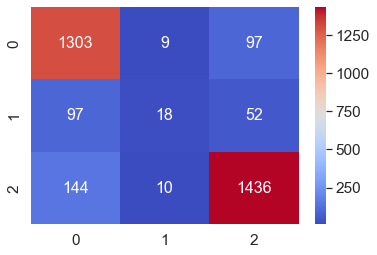

In [113]:
df_cm_LogR = pd.DataFrame(cf_LogR, range(3), range(3)) 
sns.set(font_scale=1.4)
sns.heatmap(df_cm_LogR, annot=True, annot_kws={"size": 16}, fmt='d', cmap='coolwarm')
plt.show()

### Training the Kernel SVM model (CountVectorized)

In [114]:
from sklearn.svm import SVC
start_time = time.time()
classifier_svm = SVC(kernel='rbf', gamma=0.001, C=1000).fit(X_train_encoded, y_train)
train_time = time.time() - start_time
print('Done training SVC Classifier in', train_time, 'seconds.')

Done training SVC Classifier in 9.401556968688965 seconds.


In [124]:
y_pred_svm = classifier_svm.predict(X_test_encoded)

In [156]:
from sklearn.metrics import accuracy_score, f1_score
train_score_count_ksvm = classifier_svm.score(X_train_encoded, y_train)
accuracy_count_ksvm = accuracy_score(y_test, y_pred_svm)*100
f1_score_count_ksvm = f1_score(y_test, y_pred_svm, average='macro')*100
print(f"Score train: {train_score_count_ksvm}")
print(f"accuracy: {accuracy_count_ksvm}")
print(f"f1_score: {f1_score_count_ksvm}")

Score train: 0.9967617713985647
accuracy: 85.91282375236892
f1_score: 69.05977343059591


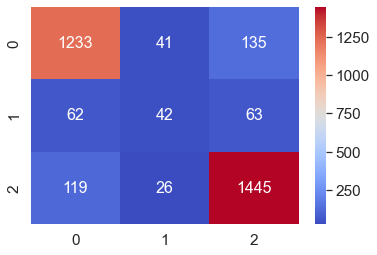

In [126]:
from sklearn.metrics import confusion_matrix
cf_svm = confusion_matrix(y_test, y_pred_svm)
df_cm_svm = pd.DataFrame(cf_svm, range(3), range(3)) 
sns.set(font_scale=1.4)
sns.heatmap(df_cm_svm, annot=True, annot_kws={"size": 16}, fmt='d', cmap='coolwarm')
plt.show()

## Encoding by TfIdfVectorizer lib

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2, 2))
vectorizer.fit_transform(X_train[0])

<11426x31384 sparse matrix of type '<class 'numpy.float64'>'
	with 130564 stored elements in Compressed Sparse Row format>

In [130]:
vectorizer.vocabulary_

{'slide giáo': 19651,
 'giáo trình': 7042,
 'trình đầy': 23733,
 'đầy đủ': 30215,
 'nhiệt tình': 15712,
 'tình giảng': 24486,
 'giảng dạy': 7216,
 'dạy gần': 5850,
 'gần gũi': 7752,
 'gũi với': 7734,
 'với sinh': 27898,
 'sinh viên': 19599,
 'đi học': 29041,
 'học đầy': 9663,
 'đủ full': 31210,
 'full điểm': 6736,
 'điểm chuyên': 29158,
 'chuyên cần': 1996,
 'chưa áp': 2398,
 'áp dụng': 28786,
 'dụng công': 6383,
 'công nghệ': 4229,
 'nghệ thông': 14845,
 'thông tin': 21499,
 'tin và': 22823,
 'và các': 26723,
 'các thiết': 3263,
 'thiết bị': 20690,
 'bị hỗ': 1334,
 'hỗ trợ': 9803,
 'trợ cho': 24094,
 'cho việc': 1928,
 'việc giảng': 26506,
 'thầy giảng': 21839,
 'giảng bài': 7185,
 'bài hay': 567,
 'hay có': 7940,
 'có nhiều': 3872,
 'nhiều bài': 15482,
 'bài tập': 670,
 'tập ví': 25371,
 'ví dụ': 27343,
 'dụ ngay': 6325,
 'ngay trên': 14592,
 'trên lớp': 23548,
 'giảng viên': 7312,
 'viên đảm': 26412,
 'đảm bảo': 30149,
 'bảo thời': 1145,
 'thời gian': 22458,
 'gian lên': 6862,
 'lên

In [131]:
#Tien hanh ma hoa 3 tap X
X_train_vectorized = vectorizer.transform(X_train[0])
X_dev_vectorized = vectorizer.transform(X_dev[0])
X_test_vectorized = vectorizer.transform(X_test[0])

In [132]:
type(X_train_vectorized)

scipy.sparse._csr.csr_matrix

In [133]:
print(X_train_vectorized)

  (0, 30215)	0.3228409542108326
  (0, 23733)	0.5996815693368086
  (0, 19651)	0.6189412728591277
  (0, 7042)	0.39123833456539536
  (1, 27898)	0.28903511039498336
  (1, 24486)	0.3510006112346577
  (1, 19599)	0.16908198857764023
  (1, 15712)	0.1868233667363346
  (1, 7752)	0.3815741496139949
  (1, 7734)	0.4240958066348821
  (1, 7216)	0.2308640067548575
  (1, 5850)	0.5924620765736374
  (2, 31210)	0.4492598564542398
  (2, 30215)	0.22448933008402433
  (2, 29158)	0.43038440412600143
  (2, 29041)	0.289398846276395
  (2, 9663)	0.36989941161389644
  (2, 6736)	0.4492598564542398
  (2, 1996)	0.37433634766416796
  (3, 28786)	0.2014063943910189
  (3, 26723)	0.2423160092091142
  (3, 26506)	0.21927569131057253
  (3, 24094)	0.2871904131522224
  (3, 22823)	0.3161664692726513
  (3, 21499)	0.20608673119394355
  :	:
  (11423, 6929)	0.6283303032088958
  (11423, 670)	0.2666497987176708
  (11424, 26105)	0.4385627673956362
  (11424, 15712)	0.2502486469721853
  (11424, 8259)	0.5734446262765527
  (11424, 7046)	0.

### Training the Naive Bayes model (Tfidf)

In [134]:
from sklearn.naive_bayes import MultinomialNB
start_time = time.time()
clf_nb = MultinomialNB().fit(X_train_vectorized,y_train)
train_time = time.time()-start_time
print("Done train Naive Bayes model in ", train_time, "seconds.")

Done train Naive Bayes model in  0.015343189239501953 seconds.


In [135]:
y_pred_NB_tfidf = clf_nb.predict(X_test_vectorized)

In [158]:
from sklearn.metrics import accuracy_score, f1_score
train_score_tfidf_naive = clf_nb.score(X_train_vectorized, y_train)
accuracy_tfidf_naive = accuracy_score(y_test, y_pred_NB_tfidf)*100
f1_score_tfidf_naive = f1_score(y_test, y_pred_NB_tfidf, average='macro')*100
print(f"Score train: {train_score_tfidf_naive}")
print(f"accuracy: {accuracy_tfidf_naive}")
print(f"f1_score: {f1_score_tfidf_naive}")

Score train: 0.9239453877122352
accuracy: 86.35502210991788
f1_score: 59.09980504824439


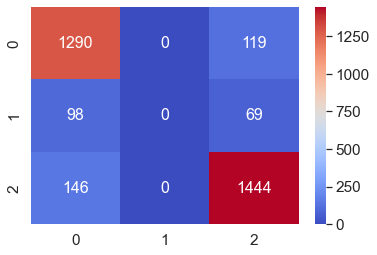

In [137]:
from sklearn.metrics import confusion_matrix
cf_NB_tfidf = confusion_matrix(y_test, y_pred_NB_tfidf)
df_cm_NB_tfidf = pd.DataFrame(cf_NB_tfidf, range(3), range(3)) 
sns.set(font_scale=1.4)
sns.heatmap(df_cm_NB_tfidf, annot=True, annot_kws={"size": 16}, fmt='d', cmap='coolwarm')
plt.show()

### Training the Logistic Regression model (Tfidf)


In [138]:
from sklearn.linear_model import LogisticRegression
start_time = time.time()
clf_logr = LogisticRegression(solver='lbfgs', 
                         multi_class='auto', 
                         max_iter=10000).fit(X_train_vectorized, y_train)
 
train_time = time.time() - start_time
print('Done training Linear Classifier in', train_time, 'seconds.')

Done training Linear Classifier in 3.072211980819702 seconds.


In [140]:
y_pred_LogR_tfidf = clf_logr.predict(X_test_vectorized)

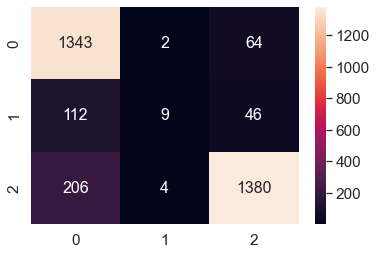

In [143]:
from sklearn.metrics import confusion_matrix
cf_LogR_tfidf = confusion_matrix(y_test, y_pred_LogR_tfidf)
df_cm_LogR_tfidf = pd.DataFrame(cf_LogR_tfidf, range(3), range(3)) 
sns.set(font_scale=1.4)
sns.heatmap(df_cm_LogR_tfidf, annot=True, annot_kws={"size": 16}, fmt='d')
plt.show()

In [161]:
from sklearn.metrics import accuracy_score, f1_score
train_score_tfidf_logr = clf_logr.score(X_train_vectorized, y_train)
accuracy_tfidf_logr = accuracy_score(y_test, y_pred_LogR_tfidf)*100
f1_score_tfidf_logr = f1_score(y_test, y_pred_LogR_tfidf, average='macro')*100
print(f"Score train: {train_score_tfidf_logr}")
print(f"accuracy: {accuracy_tfidf_logr}")
print(f"f1_score: {f1_score_tfidf_logr}")

Score train: 0.9373359005776299
accuracy: 86.29185091598231
f1_score: 62.330785392674635


### Training the Kernel SVM model (Tfidf)


In [144]:
from sklearn.svm import SVC
start_time = time.time()
clf_svm = SVC(kernel='rbf', gamma=0.001, C=1000).fit(X_train_vectorized, y_train)
train_time = time.time() - start_time
print('Done training SVC Classifier in', train_time, 'seconds.')

Done training SVC Classifier in 13.230127811431885 seconds.


In [145]:
y_pred_svm_tfidf = clf_svm.predict(X_test_vectorized)

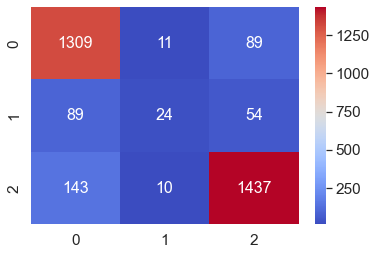

In [146]:
from sklearn.metrics import confusion_matrix
cf_svm_tfidf = confusion_matrix(y_test, y_pred_svm_tfidf)
df_cm_svm_tfidf = pd.DataFrame(cf_svm_tfidf, range(3), range(3)) 
sns.set(font_scale=1.4)
sns.heatmap(df_cm_svm_tfidf, annot=True, annot_kws={"size": 16}, fmt='d', cmap='coolwarm')
plt.show()

In [162]:
from sklearn.metrics import accuracy_score, f1_score
train_score_tfidf_ksvm = clf_svm.score(X_train_vectorized, y_train)
accuracy_tfidf_ksvm = accuracy_score(y_test, y_pred_svm_tfidf)*100
f1_score_tfidf_ksvm = f1_score(y_test, y_pred_svm_tfidf, average='macro')*100
print(f"Score train: {train_score_tfidf_ksvm}")
print(f"accuracy: {accuracy_tfidf_ksvm}")
print(f"f1_score: {f1_score_tfidf_ksvm}")

Score train: 0.9877472431297042
accuracy: 87.49210360075806
f1_score: 67.34991090455001


## Conclusion

### f1_score

In [163]:
from beautifultable import BeautifulTable

table = BeautifulTable()
table.column_headers = ["", "Naive Bayes","Logistic Regression","Kernel SVM"]
table.append_row(['CountVectorizer',  f1_score_count_naive,  f1_score_count_logr,  f1_score_count_ksvm])
table.append_row(['TfidfVectorizer', f1_score_tfidf_naive, f1_score_tfidf_logr,  f1_score_tfidf_ksvm])

print(table)

+-----------------+-------------+---------------------+------------+
|                 | Naive Bayes | Logistic Regression | Kernel SVM |
+-----------------+-------------+---------------------+------------+
| CountVectorizer |   61.264    |       65.451        |   69.06    |
+-----------------+-------------+---------------------+------------+
| TfidfVectorizer |    59.1     |       62.331        |   67.35    |
+-----------------+-------------+---------------------+------------+


/Users/nguyen/opt/anaconda3/envs/tutorial/lib/python3.8/site-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.column_headers' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTColumnCollection.header' instead.
  warnings.warn(message, FutureWarning)
/Users/nguyen/opt/anaconda3/envs/tutorial/lib/python3.8/site-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.append_row' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTRowCollection.append' instead.
  warnings.warn(message, FutureWarning)


#### Kết luận: Mô hình Kernel SVM với phương pháp mã hoá CountVectorizer cho kết quả cao nhất qua khảo sát với
#### f1_score = 69.06%, accuracy = 85.91%

### Phân tích lỗi:

1. Dự báo luôn có thể đúng hoặc sai
2. Các phương pháp mã hoá ở trên chưa tối ưu với bộ dữ liệu đang có
3. Độ train (train_score) thậm chí chưa đạt mức 1.0
4. 